In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


In [2]:
img = image.load_img ("data/Elly/16Elly.jpg")

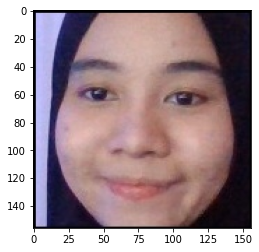

In [3]:
plt.imshow(img)

In [9]:
cv2.imread("data/Elly/16Elly.jpg").shape

(156, 156, 3)

In [45]:
IMAGE_SIZE = [200,200]

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False
    #useful for getting number of classes
    folders = glob('data/train/*') 

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()
# tell the model


Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0   

In [59]:
train =  ImageDataGenerator (rescale = 1/216)
validation = ImageDataGenerator (rescale = 1/216)

In [60]:
train_dataset = train.flow_from_directory ('data/train/',
                                           target_size = (200,200),
                                           batch_size = 3,
                                           class_mode = 'binary')
validation_dataset = train.flow_from_directory ('data/validation/',
                                           target_size = (200,200),
                                           batch_size = 3,
                                           class_mode = 'binary')

Found 1251 images belonging to 5 classes.
Found 310 images belonging to 5 classes.


In [61]:
model = tf.keras.models.Sequential ([ tf.keras.layers.Conv2D(16,(3,3), activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense (1,activation='sigmoid')                                  
                                  ])

In [63]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer= RMSprop(lr = 0.001),
  metrics=['accuracy']
)

In [67]:
model_fit = model.fit(train_dataset,
                         steps_per_epoch = 5,
                         epochs = 10,
                         validation_data = validation_dataset)

Epoch 1/10
5/5 [==============================] - 16s 3s/step - loss: -17303393.2000 - acc: 0.0667 - val_loss: -18239364.6754 - val_acc: 0.2000
Epoch 2/10
5/5 [==============================] - 15s 3s/step - loss: -30055238.4000 - acc: 0.2667 - val_loss: -26248298.4695 - val_acc: 0.2000
Epoch 3/10
5/5 [==============================] - 15s 3s/step - loss: -24469174.3000 - acc: 0.3333 - val_loss: -32424765.0696 - val_acc: 0.2000
Epoch 4/10
5/5 [==============================] - 14s 3s/step - loss: -32462170.4000 - acc: 0.4000 - val_loss: -41358104.5724 - val_acc: 0.2000
Epoch 5/10
5/5 [==============================] - 14s 3s/step - loss: -40887153.1000 - acc: 0.2667 - val_loss: -51620969.3591 - val_acc: 0.2000
Epoch 6/10
5/5 [==============================] - 14s 3s/step - loss: -40580102.6000 - acc: 0.2000 - val_loss: -62413920.1971 - val_acc: 0.2000
Epoch 7/10
5/5 [==============================] - 15s 3s/step - loss: -72451459.2000 - acc: 0.2000 - val_loss: -80406948.0751 - val_acc:

5/5 [==============================] - 16s 3s/step - loss: -76741995.4000 - acc: 0.2667 - val_loss: -112645512.8658 - val_acc: 0.2000
Epoch 10/10
5/5 [==============================] - 28s 6s/step - loss: -47376941.0500 - acc: 0.3333 - val_loss: -126453861.2758 - val_acc: 0.2000
